In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable


os.chdir('../')

# loa my modules
from src.utils import load_pkl
from src.visualise import *

In [2]:
beta_path = ['./reports/revision/Yeo7node_questionnaires_paraest_beta.txt',
            './reports/revision/Yeo7node_paraest_beta.txt']
pval_path = ['./reports/revision/Yeo7node_questionnaires_paraest_p.txt',
            './reports/revision/Yeo7node_paraest_p.txt']

labels = [
    ['BDI-II', 'Anx-S', 'Anx-T', 'NegUrge', 'lack of Premeditation', 'Perseverance', 'Sensation', 'PosUrge'],
    ['CWI', 'Tower', 'TMT', 'DF', 'Prov', 'VF', 'WASI', 'WIAT'],
]

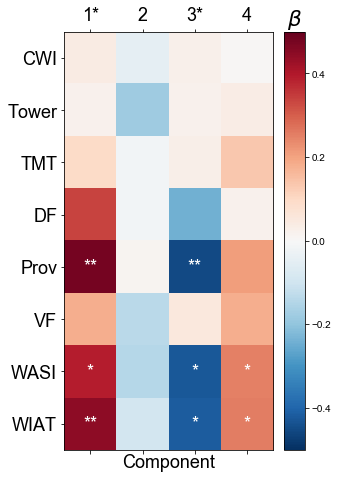

In [7]:
# plot univariate results
set_text_size(18)

fig = plt.figure(figsize=(6, 7))

b = beta_path[1]
p = pval_path[1]
label = labels[1]
    
ax = fig.add_subplot(111)
beta_val = pd.read_table(b, header=None).T
p_val = pd.read_table(p, header=None).T

t = ax.matshow((beta_val.values[1:, :].T* np.array([1, 1, -1, 1])),
               vmax=0.5, vmin=-0.5,
              cmap="RdBu_r")

ax.set_yticks(range(8))
ax.set_xticks(range(4))
ax.set_yticklabels(label)
ax.set_xticklabels(["1*", "2", "3*", "4"])
ax.set_xlabel('Component')
# add significant info
for (i,j),p in np.ndenumerate(p_val.values[1:, :]):
    if p < .001:
        plt.text(i,j,'***',ha='center',va='center', color='white')
    elif p < .01:
        plt.text(i,j,'**',ha='center',va='center', color='white')
    elif p < .05:
        plt.text(i,j,'*',ha='center',va='center', color='white')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad="5%")
cb = fig.colorbar(t, cax=cax)
cb.ax.tick_params(labelsize=10)
cb.ax.set_title(r'$\beta$')


plt.tight_layout()
# plt.savefig('./reports/plots/parameter_estimates_yeo7nodes_bon_both.png', bbox_inches='tight', dpi=300)
plt.show()